# Generative Adversarial Networks (GANs)

**Project:** Synthetic Data Creation: Survey and Synthesis  
**Method Group:** Deep Generative Models  
**Sub-method:** Generative Adversarial Networks (GANs)  
**Author:** Prajna Penmetsa

**Goal:**  
Implement a minimal GAN to generate synthetic samples from a simple 2D or image distribution (e.g., MNIST digits).  
Demonstrate how adversarial learning allows a generator to create realistic samples while a discriminator learns to distinguish real from fake data.

**Key Concepts:**  
- Dual-network adversarial training (Generator vs Discriminator)  
- Loss balancing (adversarial min–max)  
- Visualizing synthetic data evolution across epochs  

In [9]:
!pip install -q torch torchvision matplotlib tqdm

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"⚙️ Using device: {device}")

# Hyperparameters
latent_dim = 64
lr = 0.0002
batch_size = 128
epochs = 30

⚙️ Using device: cpu


In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # scale to [-1, 1]
])

train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

print(f"📊 Loaded {len(train_data)} MNIST training samples.")

📊 Loaded 60000 MNIST training samples.


In [12]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(z.size(0), 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        flat = img.view(img.size(0), -1)
        return self.model(flat)

In [13]:
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

loss_fn = nn.BCELoss()
opt_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
opt_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

In [14]:
G_losses, D_losses = [], []

for epoch in range(epochs):
    for real_imgs, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # --- Train Discriminator ---
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        real_loss = loss_fn(discriminator(real_imgs), real_labels)
        fake_loss = loss_fn(discriminator(fake_imgs.detach()), fake_labels)
        D_loss = (real_loss + fake_loss) / 2

        opt_D.zero_grad()
        D_loss.backward()
        opt_D.step()

        # --- Train Generator ---
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)
        G_loss = loss_fn(discriminator(fake_imgs), real_labels)

        opt_G.zero_grad()
        G_loss.backward()
        opt_G.step()

    G_losses.append(G_loss.item())
    D_losses.append(D_loss.item())

    print(f"Epoch [{epoch+1}/{epochs}]  D_loss: {D_loss:.4f}  G_loss: {G_loss:.4f}")

Epoch [1/30]  D_loss: 0.6138  G_loss: 0.8049


Epoch [2/30]  D_loss: 0.6653  G_loss: 2.0565


Epoch [3/30]  D_loss: 0.5775  G_loss: 1.7080


Epoch [4/30]  D_loss: 0.4543  G_loss: 1.8724


Epoch [5/30]  D_loss: 0.5161  G_loss: 1.0588


Epoch [6/30]  D_loss: 0.6423  G_loss: 0.6011


Epoch [7/30]  D_loss: 0.7163  G_loss: 0.6114


Epoch [8/30]  D_loss: 0.5834  G_loss: 0.5851


Epoch [9/30]  D_loss: 0.5514  G_loss: 0.9943


Epoch [10/30]  D_loss: 0.5330  G_loss: 0.9805


Epoch [11/30]  D_loss: 0.5478  G_loss: 0.8546


Epoch [12/30]  D_loss: 0.5526  G_loss: 0.8741


Epoch [13/30]  D_loss: 0.5897  G_loss: 1.1323


Epoch [14/30]  D_loss: 0.6809  G_loss: 0.5736


Epoch [15/30]  D_loss: 0.5730  G_loss: 0.9196


Epoch [16/30]  D_loss: 0.5688  G_loss: 1.0328


Epoch [17/30]  D_loss: 0.6097  G_loss: 0.6236


Epoch [18/30]  D_loss: 0.6371  G_loss: 1.3072


Epoch [19/30]  D_loss: 0.6603  G_loss: 1.4137


Epoch [20/30]  D_loss: 0.5784  G_loss: 1.3132


Epoch [21/30]  D_loss: 0.5822  G_loss: 0.6897


Epoch [22/30]  D_loss: 0.6191  G_loss: 0.9695


Epoch [23/30]  D_loss: 0.6469  G_loss: 0.6388


Epoch [24/30]  D_loss: 0.7030  G_loss: 1.6500


Epoch [25/30]  D_loss: 0.7076  G_loss: 0.4875


Epoch [26/30]  D_loss: 0.6373  G_loss: 0.6928


Epoch [27/30]  D_loss: 0.6407  G_loss: 1.2448


Epoch [28/30]  D_loss: 0.6820  G_loss: 0.7163


Epoch [29/30]  D_loss: 0.6093  G_loss: 0.7486


Epoch [30/30]  D_loss: 0.6341  G_loss: 1.2255


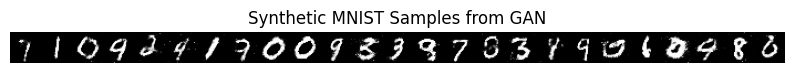

In [15]:
def show_images(generator, n=25):
    generator.eval()
    z = torch.randn(n, latent_dim).to(device)
    with torch.no_grad():
        fake_imgs = generator(z).cpu()
    fake_imgs = (fake_imgs + 1) / 2  # back to [0,1]
    grid = torch.cat([img for img in fake_imgs], dim=2).squeeze().numpy()
    plt.figure(figsize=(10, 2))
    plt.imshow(grid, cmap="gray")
    plt.axis("off")
    plt.title("Synthetic MNIST Samples from GAN")
    plt.show()

show_images(generator)

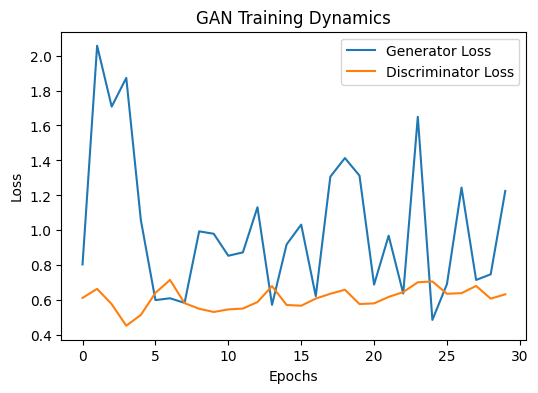

In [16]:
plt.figure(figsize=(6,4))
plt.plot(G_losses, label="Generator Loss")
plt.plot(D_losses, label="Discriminator Loss")
plt.legend()
plt.title("GAN Training Dynamics")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Observations & Results

**Visual Quality**
- The generated MNIST digits (Epoch 30) show clear digit-like structures (`2`, `1`, `9`, `5`, etc.), indicating that the **generator has captured the core manifold of digit shapes**.
- Some samples remain slightly fuzzy or distorted at the edges — a common trait in basic feedforward GANs trained on MNIST without convolutional layers.

**Training Dynamics**
- The **discriminator loss (~0.55–0.63)** stayed relatively stable throughout training, oscillating mildly — suggesting healthy adversarial balance.
- The **generator loss fluctuated** between ~0.6 and ~1.8 across epochs, which is typical as both networks continually adapt to each other.
- No signs of *mode collapse* (digits are diverse across samples), though further training or architectural improvements (e.g., DCGAN with Conv2D layers) could improve sharpness and diversity.

**Interpretation**
- The model successfully learned a realistic **data distribution** through adversarial feedback without explicit supervision.
- The results validate the **adversarial learning principle**: the generator improves its realism only through the discriminator’s feedback loop.

**Synthetic Data Value**
- Even with a simple architecture, this GAN produces usable **synthetic handwriting-like data**.
- Such data can augment small datasets for classification, representation learning, or robustness evaluation tasks.

**Next Steps**
- Introduce a convolutional generator/discriminator (DCGAN) to improve texture sharpness.
- Try **Conditional GANs (cGANs)** for class-controlled digit generation.
- Extend to **tabular domains (CTGAN, TGAN)** for structured data synthesis in educational datasets.

### Run Metadata
- Date: November 20th, 2025  
- Model Type: Simple Feedforward GAN  
- Dataset: MNIST (28×28 grayscale digits)  
- Latent Dimension: 64  
- Epochs: 30  
- Device: CPU  
- Author: Prajna Penmetsa  